# CAPSTONE SPRINT 2

---
**Patrick**

*Data Science Bootcamp*

*March 15, 2024*



---
## Data Dictionary
### DDDC.txt

| Field             | Description |
|-------------------|-------------|
| `thread_id`       | Numeric identifier for each story thread. Posts sharing the same `thread_id` are part of the same narrative thread. |
| `post_id`         | Unique identifier for each post within a thread, starting from 0. The ascending order represents the chronological sequence of the narrative. |
| `web_id`          | Post ID on the roleplayerguild.com website, used primarily for data collection purposes. |
| `author_name`     | Name of the contributor of the post. This field allows tracking of posts by the same author across different threads and links to character descriptions. |
| `author_join_time`| The time when the author joined the roleplayerguild.com website. This column is not actively used in the analysis. |
| `author_num_posts`| Total number of posts made by the author on the website. Like `author_join_time`, this column is not central to the narrative analysis. |
| `post_text`       | The actual content of the post, containing action descriptions and forming the core of the narrative data. |



---



#### Initial Steps: Importing Libraries and Loading Data 
First I will set up my environment with necessary Python libraries followed by loading the dataset into a pandas dataframe. The libraries I'll use are:
 



In [1]:
# Standard libraries for data and numerical manipulation
import numpy as np
import pandas as pd

# Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# natural language processing and text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Utility libraries
from collections import Counter
import itertools
import re

# Ensure NLTK elements are downloaded (done once)
nltk.download('punkt')
nltk.download('stopwords')


# Read the dataset into a pandas DataFrame
df_posts = pd.read_csv('/path/to/DDDC.txt', sep='\t', index_col=False)

# Add a unique index to the dataframe for ease of merging
df_posts['merge_index'] = pd.RangeIndex(start=1, stop=len(df_posts) + 1, step=1)



(In the previous sprint I dropped a column from the dataset that I would like to explore further. I'll quickly repurpose some code from my work in Sprint 1 to process the dataset and take a fresh look at it.)

#### Data Exploration and Preprocessing

I'll begin by examining the first text file, DDDC.txt, which contains narrative posts and metadata about the posts and their authors.

In [2]:
# Display the shape of the dataframe
print(f'There are {df_posts.shape[0]} rows and {df_posts.shape[1]} columns in the dataframe.')  # Use an f-string to describe the shape of the dataframe



There are 56555 rows and 8 columns in the dataframe.


The results of df_posts.shape() show us that the dataframe contains 56,555 rows and 8 columns. This aligns with the data dictionary, which tells us that each row represents a single post, with 7 columns of metadata and 1 new column of index values.

In [3]:
# Display a brief overview of the dataframe
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56555 entries, 0 to 56554
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Based on the output df.info(), the dataframe's columns appear to be unnamed. I'll name them (referring to the data dictionary) to make them more descriptive and easier to work with:

In [4]:
# Define the correct column names
column_names = ['merge_index', 'thread_id', 'post_id', 'web_id', 'author_name', 'author_join_time', 'author_num_posts', 'post_text']

# Rename the columns
df_posts.columns = column_names

# Sanity check
df_posts.columns

Index(['merge_index', 'thread_id', 'post_id', 'web_id', 'author_name',
       'author_join_time', 'author_num_posts', 'post_text'],
      dtype='object')

The naming of the columns was successful, and we can now see the column names in the output of df.columns.

In [5]:
# Display a brief overview of the dataframe
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56555 entries, 0 to 56554
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   merge_index       56555 non-null  int64 
 1   thread_id         56555 non-null  int64 
 2   post_id           56555 non-null  int64 
 3   web_id            56555 non-null  int64 
 4   author_name       56555 non-null  object
 5   author_join_time  56555 non-null  object
 6   author_num_posts  56555 non-null  int64 
 7   post_text         56554 non-null  object
dtypes: int64(5), object(3)
memory usage: 3.5+ MB


In [6]:
# View the first few entries to get an understanding of the dataframe's structure
df_posts.head()

,merge_index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
0,1,0,1,77814,card-captor,4 yrs ago,2210,Meira overheard some of the words in the argum...
1,2,0,2,78370,card-captor,4 yrs ago,2210,A lady in a red robe walked behind Meria and N...
2,3,0,3,80125,card-captor,4 yrs ago,2210,"Aira felt her skin crawl every time the word ""..."
3,4,0,4,84912,card-captor,4 yrs ago,2210,"Wonderful' Aira replied, as she walked towards..."
4,5,0,5,85279,card-captor,4 yrs ago,2210,"Oh, and where are my manners. Would you like s..."


In [7]:
# Display the last few rows of the dataframe
df_posts.tail()

,merge_index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
56550,56551,1543,117,3823645,rekaigan,2 yrs ago,1054,Rahna Altema#@##@#She watched as the mushroom ...
56551,56552,1543,118,3856743,tombprince,2 yrs ago,290,"http://i.imgur.com/Aum6ALB.jpg Blin ""Brytag"" A..."
56552,56553,1543,119,3857181,tex,3 yrs ago,2975,Gaius Stronurr#@#The Forest Floor#@#Gaius was ...
56553,56554,1543,120,3866313,mokley,3 yrs ago,2198,"Fall? I crashed actually. oh crap, my gear. We..."
56554,56555,1543,121,3874671,tombprince,2 yrs ago,290,"http://i.imgur.com/Aum6ALB.jpg Blin ""Brytag"" A..."


In [8]:
# Using `df.sample()` To get a broader and potentially more accurate picture of the dataframe
df_posts.sample(25)

,merge_index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
5905,5906,158,156,3174464,eviledd1984,3 yrs ago,3794,#@#After a having a few drinks inside of him D...
50914,50915,1374,15,3793329,narcissisticpotato,4 yrs ago,2701,#@#http://txt-dynamic.static.1001fonts.net/txt...
43599,43600,1195,25,2357081,lord-santa,3 yrs ago,1336,"Alright, let me just... Isaac said.#@#He stret..."
45082,45083,1228,62,2694193,ariamis,4 yrs ago,1997,The moment Rose withdrew from Elise's grip the...
9362,9363,264,17,3475387,ihxzardx,2 yrs ago,393,3rd Person-#@#Tristan left the others to the t...
22562,22563,652,33,1356767,eldritchone,3 yrs ago,465,The doctor was positively snarling when he ret...
20324,20325,601,48,3850115,mechonraptor,1 yr ago,470,Conan and Tadhg ó Faoláin#@##@#https://encrypt...
7673,7674,204,465,2922202,renny,3 yrs ago,2617,http://i.imgur.com/Q8w7Daw.png#@# D A I K I#@#...
9688,9689,268,248,3277619,eviledd1984,3 yrs ago,3791,#@#D'Artagan looked behind him stopping for a ...
8676,8677,244,2,3854118,coxzemun,2 yrs ago,37,#@#The strong winter breeze slammed continuous...


For the purposes of this preliminary analysis, I'll focus on the following columns: `thread_id`, `post_id`, `author_name`, `author_join_time` (which I had previously dropped), `author_num_posts` and `post_text`.  The creators of this dataset have pointed out that `web_id` is not relevant to this analysis and will be now be dropped from the dataframe.

In [9]:
# Drop unnecessary column
df_posts = df_posts.drop(columns=['web_id'])

# Sanity check
df_posts.head()


,merge_index,thread_id,post_id,author_name,author_join_time,author_num_posts,post_text
0,1,0,1,card-captor,4 yrs ago,2210,Meira overheard some of the words in the argum...
1,2,0,2,card-captor,4 yrs ago,2210,A lady in a red robe walked behind Meria and N...
2,3,0,3,card-captor,4 yrs ago,2210,"Aira felt her skin crawl every time the word ""..."
3,4,0,4,card-captor,4 yrs ago,2210,"Wonderful' Aira replied, as she walked towards..."
4,5,0,5,card-captor,4 yrs ago,2210,"Oh, and where are my manners. Would you like s..."


In [10]:
# Check for missing values
print(df_posts.isnull().sum())

merge_index         0
thread_id           0
post_id             0
author_name         0
author_join_time    0
author_num_posts    0
post_text           1
dtype: int64


This output reveals that post_text has 1 missing value. 

In [11]:
# Display the row with the missing 'post_text' value
df_posts[df_posts['post_text'].isnull()]


,merge_index,thread_id,post_id,author_name,author_join_time,author_num_posts,post_text
32518,32519,888,1,polybius,2 yrs ago,893,NaN


This output indicates that row 32518 of the `post_text` column has a missing value. The other columns in this row contain valid values. Taking a closer look: 

In [12]:
# filter for thread_id "888"
df_posts[df_posts['thread_id'] == 888]

,merge_index,thread_id,post_id,author_name,author_join_time,author_num_posts,post_text
32517,32518,888,0,polybius,2 yrs ago,893,1888#@#The Story of Hurston Macabre#@#Welcome ...
32518,32519,888,1,polybius,2 yrs ago,893,NaN


I think it's safe to drop this single row, as the thread containing it only has two posts, one of them empty.

In [13]:
# Drop row with missing 'post_text' value
df_posts = df_posts.dropna(subset=['post_text'])

In [14]:
# Sanity check
print(df_posts.isnull().sum())

df_posts.shape

merge_index         0
thread_id           0
post_id             0
author_name         0
author_join_time    0
author_num_posts    0
post_text           0
dtype: int64


(56554, 7)

The output of the sanity check reveals that there are no more missing values in the dataframe and the shape of the dataframe is now 56,554 rows and 7 columns.

In [15]:
# Check for duplicate rows
df_posts.duplicated().sum() 

0

This output confirms that there are no duplicate rows in the dataframe.

In [16]:
# Display a brief overview of the dataframe
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56554 entries, 0 to 56554
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   merge_index       56554 non-null  int64 
 1   thread_id         56554 non-null  int64 
 2   post_id           56554 non-null  int64 
 3   author_name       56554 non-null  object
 4   author_join_time  56554 non-null  object
 5   author_num_posts  56554 non-null  int64 
 6   post_text         56554 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.5+ MB


In summary, after dropping the unnecessary column and removing a single null value and confirming that there are no duplicate rows, the `df_post` appears clean and ready for further exploration.  For the purposes of Sprint 2 I will not need the character description data, so I will not be loading that file into a dataframe.  I'll export the cleaned dataframe to a new csv file and move on to the next steps in the EDA process.

In [17]:
# Export the cleaned posts dataframe
df_posts.to_csv('/Users/NEMETH/SCHOOL/CAPSTONE/DATA/cleaned_posts.csv', index=False)


# EDA


I'll begin by grouping the data by author_name and applying aggregation functions: 

In [18]:
# Grouping the DataFrame by 'author_name' and aggregating
author_activity = df_posts.groupby('author_name').agg({
    'post_id': 'count',  # Count the number of posts
    'thread_id': pd.Series.nunique,  # Calculate the number of unique threads
}).rename(columns={'post_id': 'total_posts', 'thread_id': 'unique_threads'}) # Rename the columns for clarity


In [19]:
# Sanity Check
author_activity.head(15) # Display the first 15 rows of the dataframe


,total_posts,unique_threads
author_name,,
13nightingale,4,2
13org,56,8
13sparx13,3,2
1charak2,11,4
1hawkeyes,30,7
1hitpointwonder,2,1
1n5tant-ar50n,1,1
20aliens,4,1
21308,7,1


In [20]:
# Display statistical summary of the 'total_posts' column
author_activity['total_posts'].describe()


count    2807.000000
mean       20.147488
std        34.357855
min         1.000000
25%         3.000000
50%         8.000000
75%        22.000000
max       540.000000
Name: total_posts, dtype: float64

In [21]:
# descriptive statistics for 'unique_threads'
unique_threads_stats = author_activity['unique_threads'].describe()
print(unique_threads_stats)


count    2807.000000
mean        3.480941
std         4.464349
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        46.000000
Name: unique_threads, dtype: float64


#### Statistical Insights

'total_posts`

**Count:** There are **2,807 authors** 

**Mean:** Each an author has made around **20 posts** on average

**Standard Deviation:** The standard deviation is roughly 34 posts, which indicates a significant spread in the number of posts per author. 

**Minimum:** The least active author has made only one post

**Quartiles:**

- The **25% percentile** is at **3 posts**, suggesting that a quarter of the authors have made 3 or less posts.

- The median (**50% percentile**) is at **8 posts**, indicating that half of the authors have made 8 or fewer posts.

- The **75% percentile** is at **22 posts**, meaning that three-quarters of the authors have made up to 22 posts.

**Maximum:** The most active author has made 540 posts


These stats suggest that there is a small group of very active authors, but the majority of authors are less active.

`unique_threads`

**count:** Same as total_posts, there are **2,807 authors** in this analysis dataset.

**mean:** On average, each author has participated in about **3.48 threads**.

**Standard Deviation:** The standard deviation is **4.46**, indicating variation in how authors participate across different threads.

**Minimum:** The minimum number of threads an author has participated in is **1**, showing that some authors post in just a single thread.

**Quartiles:**

- The **25% percentile** 25% of the authors have participated in **1 thread only**

- The median (**50% percentile**) Half of the authors have participated in **2 or fewer threads**.

- The **75% percentile** 75% of the authors have participated in up to 4 threads

**Maximum:** The most active author has participated in **46 different threads**

In [22]:
# Sort authors by the number of posts in descending order and select the top 25
top_authors_by_posts = author_activity.sort_values(by='total_posts', ascending=False).head(25)
top_authors_by_posts


,total_posts,unique_threads
author_name,,
vancexentan,540,21
caits,483,23
eklispe,338,36
rune_alchemist,308,44
jangel13,300,24
raijinslayer,280,25
polaris-north,278,32
zarkun,271,10
card-captor,243,19


This bar chart displays the top 25 authors on the y-axis and their corresponding post count on the x-axis:

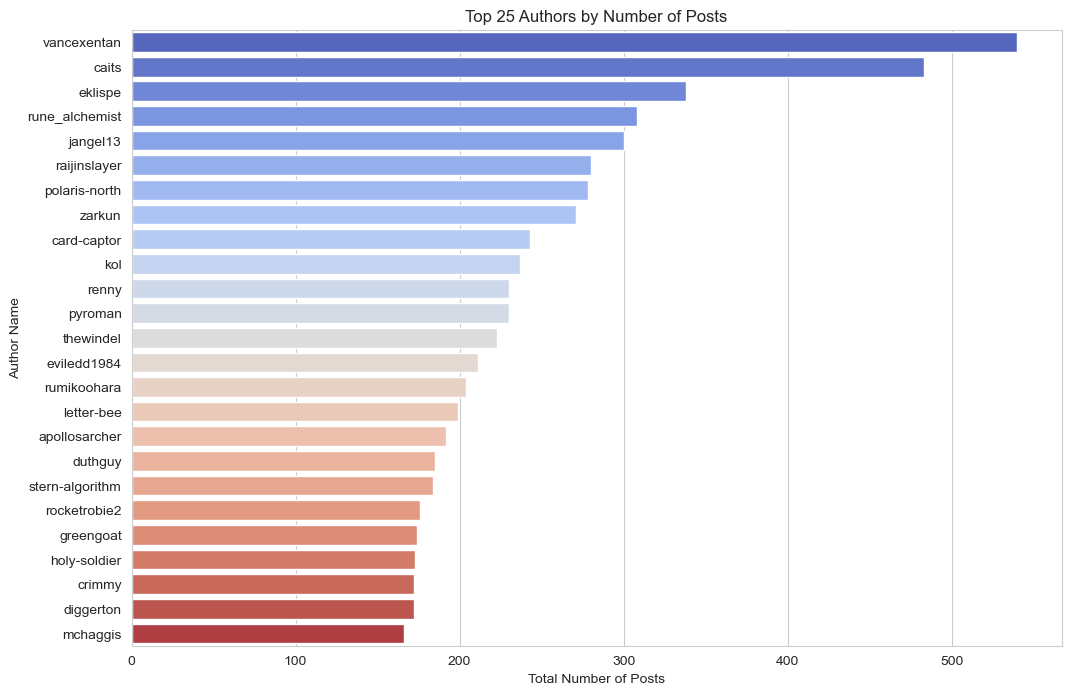

In [23]:
# Set style of the plot
sns.set_style("whitegrid")

# bar chart for the top 25 authors by the number of posts
plt.figure(figsize=(12, 8))
sns.barplot(x='total_posts', y=top_authors_by_posts.index, data=top_authors_by_posts, palette="coolwarm")
plt.title('Top 25 Authors by Number of Posts')
plt.xlabel('Total Number of Posts')
plt.ylabel('Author Name')
plt.show()


In [24]:
# Sort authors by the number of unique threads they have participated in, in descending order and selecting only the 'unique_threads' column for display
top_authors_by_threads = author_activity.sort_values(by='unique_threads', ascending=False).head(25)[['unique_threads']]
top_authors_by_threads


# Display the top authors and their unique thread participation
print("Top 25 Authors by Number of Unique Threads Participated In:")
for author, row in top_authors_by_threads.iterrows():
    print(f"{author}: {row['unique_threads']} unique threads")
    
    

Top 25 Authors by Number of Unique Threads Participated In:
misscapncrunch: 46 unique threads
rune_alchemist: 44 unique threads
fabricant451: 37 unique threads
mr_pink: 36 unique threads
theunknowable: 36 unique threads
mchaggis: 36 unique threads
eklispe: 36 unique threads
apollosarcher: 34 unique threads
knighthawk: 32 unique threads
polaris-north: 32 unique threads
rocketrobie2: 30 unique threads
kol: 29 unique threads
scarifar: 29 unique threads
renny: 27 unique threads
agentmanatee: 27 unique threads
t2wave: 27 unique threads
weird-tales: 27 unique threads
vitavitaar: 26 unique threads
karamonnom: 26 unique threads
saarebas: 26 unique threads
eisenhorn: 25 unique threads
alexfangtalon: 25 unique threads
smarty0114: 25 unique threads
raijinslayer: 25 unique threads
member-00492: 24 unique threads


In [25]:
# Sort authors by the number of unique threads they have participated in, in descending order and selecting the 'unique_threads' column to display
top_authors_by_threads = author_activity.sort_values(by='unique_threads', ascending=False).head(25)[['unique_threads']]
top_authors_by_threads


,unique_threads
author_name,
misscapncrunch,46
rune_alchemist,44
fabricant451,37
mr_pink,36
theunknowable,36
mchaggis,36
eklispe,36
apollosarcher,34
knighthawk,32


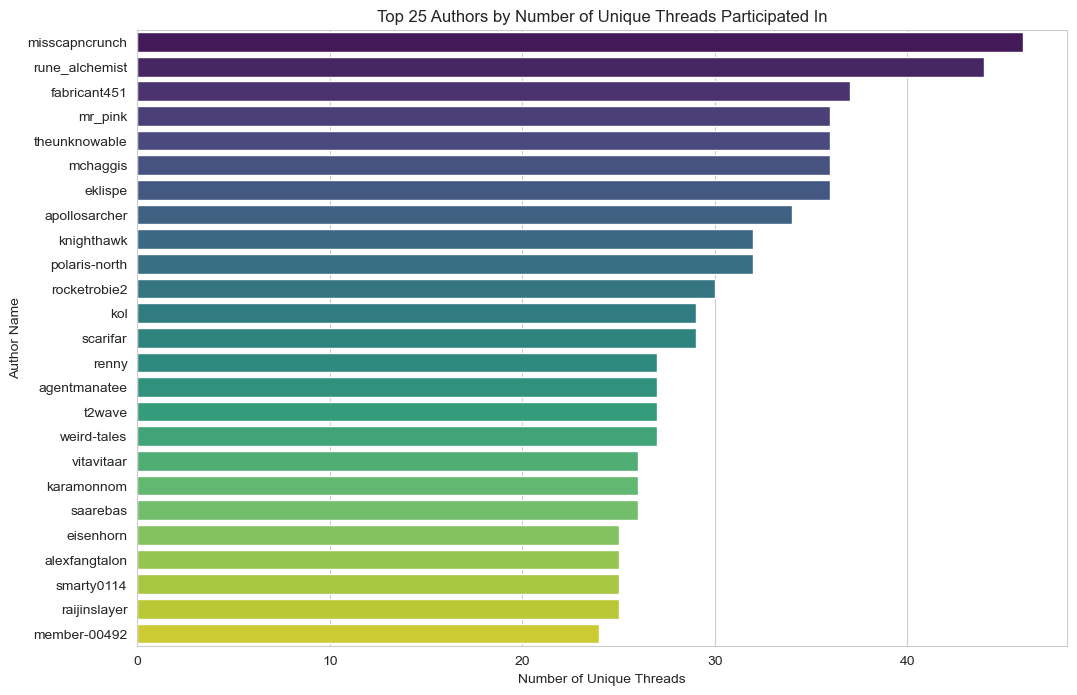

In [26]:
# Set style of the plot
sns.set_style("whitegrid")

# bar chart for the top 25 authors by the number of unique threads participated in
plt.figure(figsize=(12, 8))
sns.barplot(x='unique_threads', y=top_authors_by_threads.index, data=top_authors_by_threads, palette="viridis")
plt.title('Top 25 Authors by Number of Unique Threads Participated In')
plt.xlabel('Number of Unique Threads')
plt.ylabel('Author Name')
plt.show()


In [53]:
# Calculate the correlation coefficient between 'total_posts' and 'unique_threads'
correlation = author_activity['total_posts'].corr(author_activity['unique_threads'])
print(f"Correlation between total posts and unique threads: {correlation:.2f}")



Correlation between total posts and unique threads: 0.78


With a correlation coefficient of 0.78, there appears a strong positive correlation between the total number of posts an author makes and the number of unique threads they participate in.  This suggests that authors who post more frequently tend to participate in more unique threads



In [28]:
# Calculate the length of each post
df_posts['post_length'] = df_posts['post_text'].apply(len)

# Calculate the average post length by author
avg_post_length_by_author = df_posts.groupby('author_name')['post_length'].mean().reset_index(name='average_post_length')



In [29]:
# Sort the authors by average post length in descending order and display the top 25
avg_post_length_by_author_sorted = avg_post_length_by_author.sort_values(by='average_post_length', ascending=False)
avg_post_length_by_author_sorted.head(25)


,author_name,average_post_length
1985,riffus-maximus,27584.982759
1781,papitan,21470.655172
1648,near,17427.000000
1952,reddusk,17405.103896
1864,prizrak,14751.000000
1119,january,14513.271186
1394,little-italy,14244.000000
428,chasers115,13182.673469
430,chenzor,12592.000000
2714,xcrazyxfacex,12076.900000


In [30]:
# Sort the DataFrame by average post length in ascending order to find authors with shorter average posts
sorted_avg_post_length_by_author_asc = avg_post_length_by_author.sort_values(by='average_post_length', ascending=True)
sorted_avg_post_length_by_author_asc.head(25)


,author_name,average_post_length
113,alupi,1.000000
1371,leysos,1.000000
521,cross,3.000000
667,dooly,5.000000
2061,saint,25.000000
65,ailuric,55.333333
243,azkott,70.000000
296,bjftaylor,80.466667
2017,rosefire,102.000000
833,flamingevilwolfgirl,136.000000


In [31]:
# Calculate descriptive statistics for 'average_post_length'
desc_stats = avg_post_length_by_author['average_post_length'].describe()
print(desc_stats)


count     2807.000000
mean      2624.237359
std       1877.943713
min          1.000000
25%       1454.565517
50%       2184.000000
75%       3217.750000
max      27584.982759
Name: average_post_length, dtype: float64


### Interpretation of Descriptive Statistics for Average Post Length

- **Count:** Again, the dataset includes **2,807 authors**

- **Mean (Average):** The mean post length is **2,624 characters**

- **Standard Deviation:** With a standard deviation of **1,877 characters**, there is substantial variability in post lengths 

- **Minimum:** The minimum average post length is just **1 character**

- **Quartiles:**

  - **25% percentile:** A quarter of authors have an average post length of **1,454 characters or less**

  - **Median (50% percentile):** The median average post length is **2,184 characters**

  - **75% percentile:** 75% of authors have an average post length of no more than **3,217 characters**

- **Maximum:** The longest average post length is an extensive **27,584 characters**



/Users/NEMETH/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


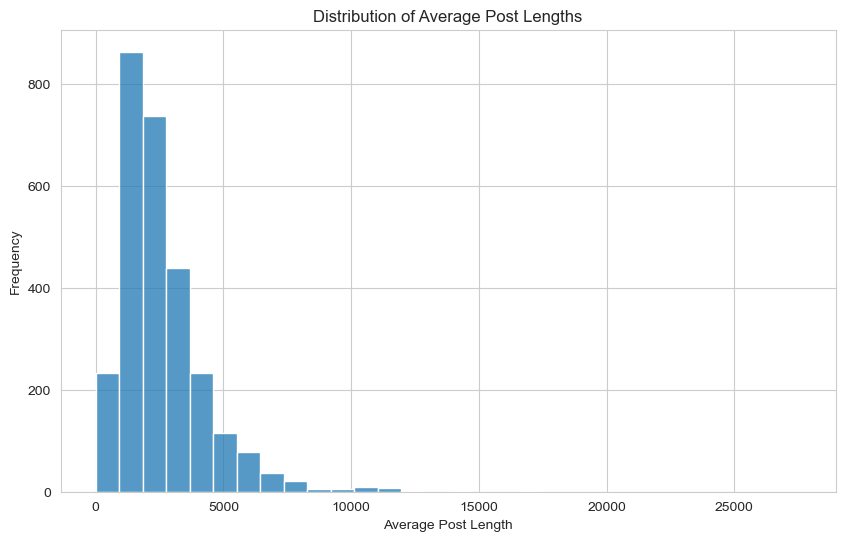

In [32]:
# Plot the distribution of average post lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(avg_post_length_by_author['average_post_length'], bins=30)
plt.title('Distribution of Average Post Lengths')
plt.xlabel('Average Post Length')
plt.ylabel('Frequency')
plt.show()


This pattern suggests that while most authors tend to write shorter posts, there's a subset that regularly produce much longer posts.

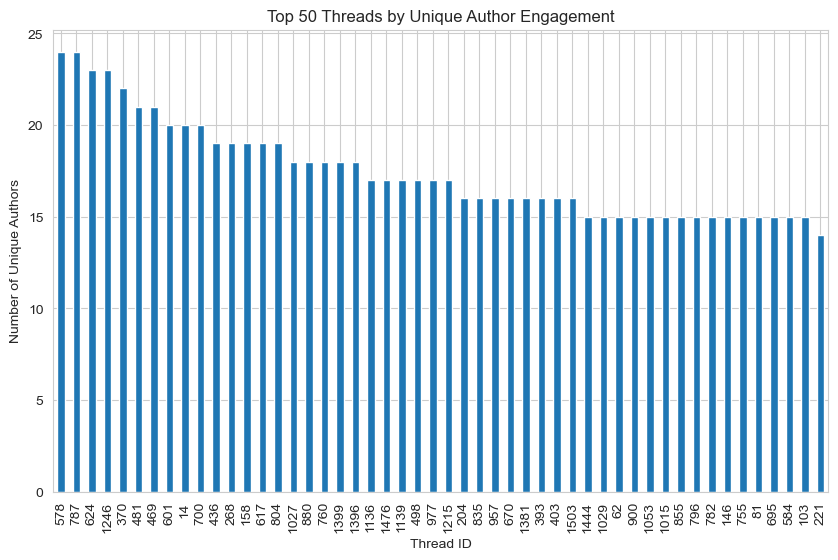

In [33]:
# Calculate the number of unique authors per thread
thread_author_diversity = df_posts.groupby('thread_id')['author_name'].nunique().sort_values(ascending=False)

# Plot the number of unique authors for the top 50 threads
plt.figure(figsize=(10, 6))
thread_author_diversity.head(50).plot(kind='bar')
plt.title('Top 50 Threads by Unique Author Engagement')
plt.xlabel('Thread ID')
plt.ylabel('Number of Unique Authors')
plt.show()



In [34]:
# Display the unique values of 'author_join_time'
print(df_posts['author_join_time'].unique()[:50])

['4 yrs ago' '3 yrs ago' '5 mos ago' '24 days ago' '7 mos ago' '2 yrs ago'
 '1 yr ago' '8 mos ago' '12 mos ago' '11 mos ago' '10 mos ago' '4 mos ago'
 '16 Jan 2014 12:34' '16 Jan 2014 10:39' '16 Jan 2014 21:57'
 '16 Jan 2014 6:09' '22 Jan 2014 1:02' '16 Jan 2014 16:09'
 '22 Jan 2014 1:24' '19 Mar 2014 15:29' '21 Jan 2014 3:29'
 '2 Apr 2014 17:59' '17 Jan 2014 14:45' '17 Jan 2014 7:30'
 '16 Jan 2014 10:19' '30 Mar 2014 19:14' '18 Jan 2014 0:26'
 '24 Feb 2014 19:24' '18 Jan 2014 23:37' '21 Jan 2014 0:07'
 '28 Jan 2014 2:22' '22 Jan 2014 22:44' '16 Jan 2014 14:10'
 '9 Mar 2014 17:15' '8 Jun 2015 3:22' '29 Apr 2014 5:56' '4 May 2014 5:48'
 '6 Feb 2014 22:10' '26 Mar 2014 12:45' '19 Jan 2014 22:18'
 '16 Mar 2014 1:18' '16 Mar 2014 1:14' '16 Jan 2014 12:36'
 '19 Mar 2014 0:41' '9 Feb 2014 17:03' '2 Mar 2014 6:49' '7 Feb 2014 5:40'
 '9 mos ago' '2 mos ago' '3 mos ago']


This output reveals a mix of time formats, which will need to be examined further

In [35]:
# Calculate the counts of each unique value in 'author_join_time'
author_join_time_counts = df_posts['author_join_time'].value_counts()

# Display the counts
print(author_join_time_counts)


author_join_time
4 yrs ago            21826
3 yrs ago            15331
2 yrs ago            10695
1 yr ago              3085
10 mos ago             418
                     ...  
20 Mar 2014 15:18        1
18 Jan 2014 1:41         1
17 Jan 2014 4:28         1
6 Sep 2015 20:56         1
16 Jan 2014 19:58        1
Name: count, Length: 439, dtype: int64


After considering the complexity and limited value add of this column, I'm going to drop it again, for now.  

In [36]:
# Dropping the 'author_join_time' column from the DataFrame
df_posts.drop('author_join_time', axis=1, inplace=True)

# Sanity check to ensure the column is dropped
print(df_posts.columns)


Index(['merge_index', 'thread_id', 'post_id', 'author_name',
       'author_num_posts', 'post_text', 'post_length'],
      dtype='object')


## Analyzing Text Data
Let's take a random sample of post texts to get a feel for the the `post_text` column to understand the formatting and content:

In [37]:
# Let's display random samples from the 'post_text' column to understand the formatting and content
sample_posts = df_posts['post_text'].sample(n=10, random_state=42)

# Printing the samples to inspect
for i, post in enumerate(sample_posts, start=1):
    print(f"Sample {i}:\n{post}\n{'-'*100}\n")


Sample 1:
He's right, we should just talk about it on the way. From the way the map looks, our best bet on making good time is to go to the train closest to here and stay on that train until we make it to where the North District and North District meet. Damon said as he opened the door. "I hate to rush everyone, but I also have no idea when the shops close either."#@#Damon was ready to go, as always. It was in his nature to keep on the move. He had always been quick to do everything, which had a tendency to get him in trouble. As he looked over his teammates, he knew it would be a problem in combat. However, he'd already grown to trust them, and it was as if he knew they would have his back. He felt safe with his team. Damon didn't often ever feel safe working with anyone else, but something about today had reassured him that everything would be alright.
----------------------------------------------------------------------------------------------------

Sample 2:
Christopher Harris#@

First I'll remove any URLs from the post_text column

In [38]:
#  Function to remove URLs from the 'post_text' column
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Applying the function to the 'post_text' column
df_posts['post_text_clean'] = df_posts['post_text'].apply(remove_urls)


Convert to lowercase

In [39]:
df_posts['post_text_clean'] = df_posts['post_text_clean'].str.lower() # Convert the text to lowercase



I previously identified that #@# is a placeholder for section breaks within posts. I'll replace it with a clearly defined token, <SECTION_BREAK> 

In [40]:
df_posts['post_text_clean'] = df_posts['post_text_clean'].replace('#@#', ' <SECTION_BREAK> ') # Ensuring <SECTION_BREAK> is treated as a single word and not affected by the regex


Now, I'll define a function to clean the text of special characters

In [41]:
def clean_text(text):
    # Removing all special characters except underscores
    text = re.sub(r'[^\w\s]', ' ', text)
    # Collapsing multiple spaces into one
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_posts['post_text_clean'] = df_posts['post_text_clean'].apply(clean_text)




I'll now display a random sample of original posts alongside their cleaned counterparts to see the effect of the cleaning process:

In [42]:
# Display a random sample of original and cleaned posts for comparison
sample_comparison = df_posts[['post_text', 'post_text_clean']].sample(20)
print(sample_comparison)


                                               post_text  \
20933  Yes sir, Toland replied. "No need to worry abo...   
15010  The remainder of the train ride passed with mo...   
33605  The abrupt change in tone and conversation was...   
31485  Jake Evanston#@#https://thoughtsofa20yearold.f...   
20987  Let the adventure begin...#@##@#http://img14.d...   
3492   After the fight, Iabor slowly stood up with a ...   
31390  #@#Picture#@#http://fontmeme.com/permalink/161...   
17864  Jack was startled by this new information and ...   
5830   #@##@#"Mhm I guess we could do that smoothskin...   
15921  It took a bit longer for him to finish his bus...   
55867  **"Oh!!"** Sophie yelled aloud, having complet...   
13457  Larimar#@#Larimar was calmly petting and playi...   
5497   She kept going, ignoring his question until th...   
8561   Orran nodded in understanding as the Officer t...   
20392  Sadie Hill#@#http://www.wilsoninfo.com/lines/c...   
23140  #@#Hank walked into the house, he

In [43]:
# Tokenize the text
words = word_tokenize(' '.join(df_posts['post_text_clean']))

# Calculate frequency of each word
word_freq = Counter(words)

# 20 most common words
most_common_words = word_freq.most_common(20)

# display the most common words
print("Top 20 most common words:")
for word, freq in most_common_words:
    print(f'{word}: {freq}')


Top 20 most common words:
the: 1384111
to: 802882
a: 608754
and: 584323
of: 525721
he: 469020
was: 425611
she: 370842
her: 349949
it: 341805
his: 329871
in: 308535
that: 298220
as: 257392
i: 216715
with: 201560
t: 201079
you: 187504
for: 182880
had: 180682


This output reveals that the most common words are stopwords. I'm going to leave these for now, as their nuance may be important in the context of the narratives 

### Baseline modelling

#### Sentiment Analysis

In [44]:
# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to calculate sentiment for each cleaned post
df_posts['sentiment'] = df_posts['post_text_clean'].apply(calculate_sentiment)


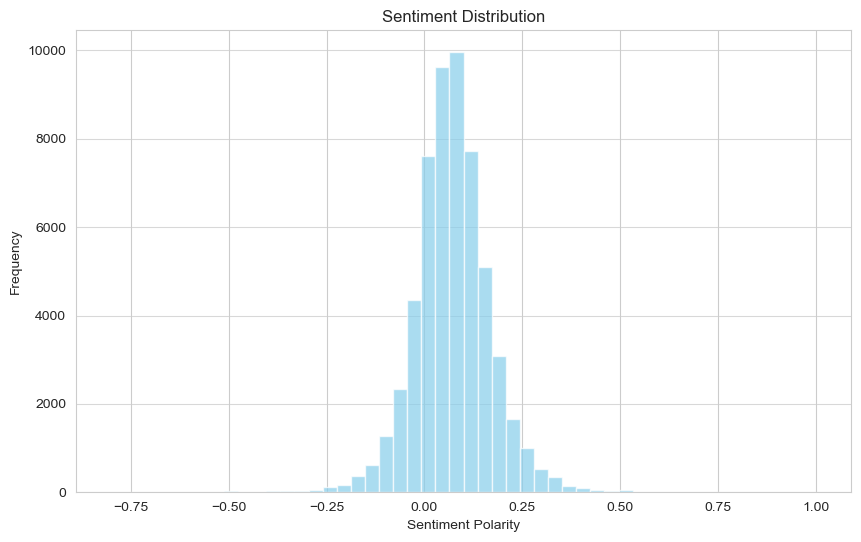

In [45]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df_posts['sentiment'], bins=50, alpha=0.7, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


From the histogram, it looks like there's a central tendency around neutral sentiment scores 

#### Named Entity Recognition

In [46]:
# Load the spacy model
nlp = spacy.load("en_core_web_sm")


In [47]:
# Function to extract named entities using spaCy
def extract_entities(text):
    # Process the text 
    doc = nlp(text)
    # Extract entities and their labels
    return [(ent.text, ent.label_) for ent in doc.ents]


In [48]:
# Randomly sample 100 posts and extract their named entities
df_posts['named_entities'] = df_posts['post_text_clean'].sample(100, random_state=1).apply(extract_entities) 


In [49]:
# Drop rows with missing values and print the named entities for the sampled posts
print(df_posts['named_entities'].dropna().to_string(index=False))


[(fourth, ORDINAL), (hours, TIME), (cara, PERSO...
[(taco bell, ORG), (years, DATE), (only one, CA...
[(zam, PERSON), (mortosh, PERSON), (mortosh, GP...
  [(one, CARDINAL), (two, CARDINAL), (asari, ORG)]
[(xander meant, PERSON), (han s assault, PERSON...
[(james falcon, PERSON), (a almost metre, QUANT...
[(james carson, PERSON), (less than two hours, ...
[(derrick, PERSON), (second, ORDINAL), (today, ...
[(jack cryopod, PERSON), (first, ORDINAL), (jac...
[(kuu kid yuriha, PERSON), (kuu, PERSON), (yest...
                                                []
[(first, ORDINAL), (some two years, DATE), (ton...
[(one, CARDINAL), (the last several months, DAT...
[(may 15th 1972, DATE), (washington, GPE), (ric...
[(fujitora, PERSON), (the top of, DATE), (kimon...
[(akio, PERSON), (akio, PERSON), (zero, CARDINA...
[(chihiro, PERSON), (chihiro, PERSON), (one, CA...
[(first, ORDINAL), (minute, TIME), (two, CARDIN...
                   [(two, CARDINAL), (mans, NORP)]
[(one, CARDINAL), (one, CARDINA

Entities appear to be  identified with labels indicating their type such as `PERSON` for  names, `GPE` for locations, and `ORDINAL` for numbers, etc. 

#### Topic Modeling with LDA

In [50]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english') # Remove stopwords

# Fit and transform the posts
X = vectorizer.fit_transform(df_posts['post_text_clean']) 


Applying the LDA algorithm to discover topics:

In [51]:
# Initialize LDA with 10 topics
lda = LatentDirichletAllocation(n_components=10, random_state=0) # random_state is set for reproducibility

# Fit LDA to the vectorized data
lda.fit(X) # X is the document-term matrix


LatentDirichletAllocation(random_state=0)

In [52]:
# Retrieve the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-11:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    print(f"Topic #{topic_idx}:")
    print(", ".join(top_features))
    print("\n")


Topic #0:
like, just, said, didn, looked, girl, head, eyes, know, little


Topic #1:
man, time, like, people, way, just, did, city, world, long


Topic #2:
just, didn, like, wasn, time, did, know, eyes, said, really


Topic #3:
just, like, room, didn, time, said, looked, wasn, going, people


Topic #4:
ship, captain, team, time, just, said, like, room, need, way


Topic #5:
just, like, didn, time, wasn, going, said, way, did, riley


Topic #6:
ground, eyes, like, body, man, hand, head, just, away, time


Topic #7:
said, just, like, looked, going, time, know, got, head, way


Topic #8:
like, just, said, didn, time, alex, looked, way, did, know


Topic #9:
man, said, like, just, looked, didn, hand, head, bar, way




The results of these baseline models make it clear that I need to refine my  approach. This may involve further preprocessing, exploring alternative modeling techniques, or possibly even going back to the drawing board to reassess my strategy with this Capstone. 